<a href="https://colab.research.google.com/github/ze-16/cancer-mortality-and-survival-projection/blob/main/Zarar_Ehsan_Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Notebook Author: Zarar Ehsan
*   Notebook Reviewer: Kusi Yeremiah



Reviewer checks performed:




*   Classification report check
*   Confusion Matrix check


*   Comparing actual values vs predicted values check













Review date: 12/03/2025

Reviewers recommendations:


*   Import all needed libraries
*   Fully implement Notebook



Code block 1 from Code re-use session 2

In [ ]:
import pandas as pd
#Importing pandas library to acces and load my dataset.



1.   Code block 7 from code re-use session 2
2.   Code block 9 from code re-use session 2

1.   Code block 20 from code re-use session 2
2.   Code block 24 from code re-use session 2

1.   Code block 17 from code re-use session 2
2.   Code block 17 from code re-use session 2

1.   Code block 18 from code re-use session 2
2.   Code block 19 from code re-use session 2

1.   From seminar 8 (Artificial neural networks and MLP) page 3 code prompt 1











In [ ]:
# 1.
#Import library to randomly sample traiing data and test data and split the data into two subsets for Machine learning algorithm.
from sklearn.model_selection import train_test_split

# 2.
#Importing library to initiate the logistic regression modelling algorithm to predict a patients mortality status.
from sklearn.linear_model import LogisticRegression

# 3.
#Importing library to initiate the K-nearest neighbours modelling algorithm to predict a patients mortality status.
from sklearn.neighbors import KNeighborsClassifier

# 4.
#Importing a library to initiate nested cross-validation to find the best combination of hyperparameters.
from sklearn.model_selection import GridSearchCV

# 5.
#Importing library to initiate confusion matrix into environment.
from sklearn.metrics import confusion_matrix

# 6.
#Importing library to display confusion matrix.
from sklearn.metrics import ConfusionMatrixDisplay

# 7.
#Importing library to initiate classification report into environment.
from sklearn.metrics import classification_report

# 8.
#Importing library to initiate AUC-ROC graphical performance metric.
from sklearn.metrics import RocCurveDisplay

# 9.
#Importing library to initiate standardscaler into environment.
from sklearn.preprocessing import StandardScaler



Code block 2 from code re-use session 2

In [ ]:
CatData = pd.read_csv('/content/CatDATASET.csv')
#Method to load in dataset and set it to variable CatData.

Code block 3 from code re-use session 2

In [ ]:
CatData.head()
#Method to access and display recorded values per variable.

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68.0,1,1,1,1,3,1,4.0,1,1,24.0,1,60,1
1,50.0,2,2,2,2,2,1,35.0,1,1,14.0,5,62,1
2,58.0,3,3,3,2,2,1,63.0,1,1,14.0,7,75,1
3,58.0,1,1,1,1,3,1,18.0,1,1,2.0,1,84,1
4,47.0,2,1,4,1,3,1,41.0,1,1,3.0,1,50,1


Code block 4 from code re-use session 2

In [ ]:
CatData.info()
#Method for exploring datatypes for all variables in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4006 non-null   float64
 1   T_Stage                 4006 non-null   int64  
 2   N_Stage                 4006 non-null   int64  
 3   6th_Stage               4006 non-null   int64  
 4   Differentiated          4006 non-null   int64  
 5   Grade                   4006 non-null   int64  
 6   A_Stage                 4006 non-null   int64  
 7   Tumor_Size              4006 non-null   float64
 8   Estrogen_Status         4006 non-null   int64  
 9   Progesterone_Status     4006 non-null   int64  
 10  Regional_Node_Examined  4006 non-null   float64
 11  Reginol_Node_Positive   4006 non-null   int64  
 12  Survival_Months         4006 non-null   int64  
 13  Mortality_Status        4006 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 4

Code block 6 from code re-use session 2

In [ ]:
feature_cols = ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated','Grade','A_Stage','Tumor_Size',
                'Estrogen_Status','Progesterone_Status','Regional_Node_Examined','Reginol_Node_Positive','Survival_Months']

X = CatData[feature_cols]

y = CatData['Mortality_Status']

print ('X features:', feature_cols)
print ('y target:', y.name)
#Declaring input features and target features into environment.
#Print statements to list these input and target features.

X features: ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months']
y target: Mortality_Status


Code block 8 from code re-use session 2

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=14, stratify=y)
print('X_Train instances', X_train.shape)
print('X_Test instances', X_test.shape)
#Method to ensure dataset gets sampled into training
#and test subsets with a ratio of my choice and ensuring the reproducibility of the sampling.

X_Train instances (2804, 13)
X_Test instances (1202, 13)


From seminar 8 (Artificial neural networks and MLP) page 4 code prompt 1

In [ ]:
sc = StandardScaler()
scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Using previously initiated library to scale my dataset using standard scaler
#To help improve performance of upcoming Machine learning algorithms

Code block 21 from code re-use session 2

Code block 22 from code re-use session 2

In [ ]:
#Declaring K-nearest neighbour modelling algorithm into environment
knn = KNeighborsClassifier(n_neighbors = 9)
#Building Knn model using scaled training data subset
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=9)

Code block 23 from code re-use session 2

Code block 14 from code re-use session 2

In [ ]:
#Function to predict mortality status of patients in the isolated scaled test data subset
y_pred=knn.predict(X_test_scaled)

#Creating and presenting a comparison of predicted and test data in a dataframe
compare_results_knn_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
compare_results_knn_df

,Actual,Predicted
684,1,1
160,1,1
517,1,2
2555,1,1
1781,1,1
...,...,...
3871,2,1
3418,1,1
1501,1,1
1579,1,1


Code block 18 from code re-use session 2

In [ ]:
print(classification_report(y_test, y_pred))
#Displaying foundation-combined performance metrics in a sngle report.

              precision    recall  f1-score   support

           1       0.88      0.97      0.92      1018
           2       0.63      0.24      0.35       184

    accuracy                           0.86      1202
   macro avg       0.76      0.61      0.64      1202
weighted avg       0.84      0.86      0.84      1202



Code block 17 from code re-use session 2

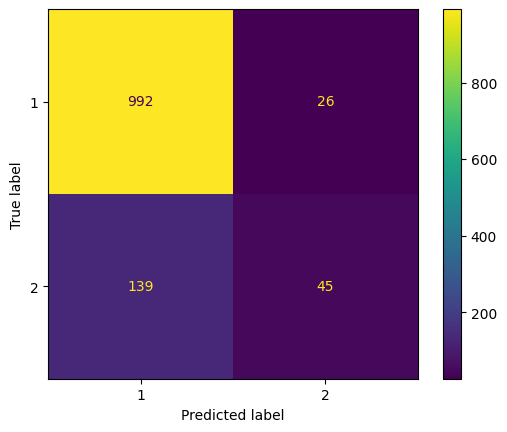

In [ ]:
#To assess how well the model predicted the mortality status of cancer patients in the unseen data subset
#Calculate and create a confusion matrix
cm_knn = confusion_matrix(y_test, y_pred, labels = knn.classes_)

#Plot the confusion matrix
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn_cm.plot()

From seminar 4 (Week4_NB_KNN_GridSearch v3.0) page 9 step 9 code prompt 1

Text(0, 0.5, 'Mean Error')

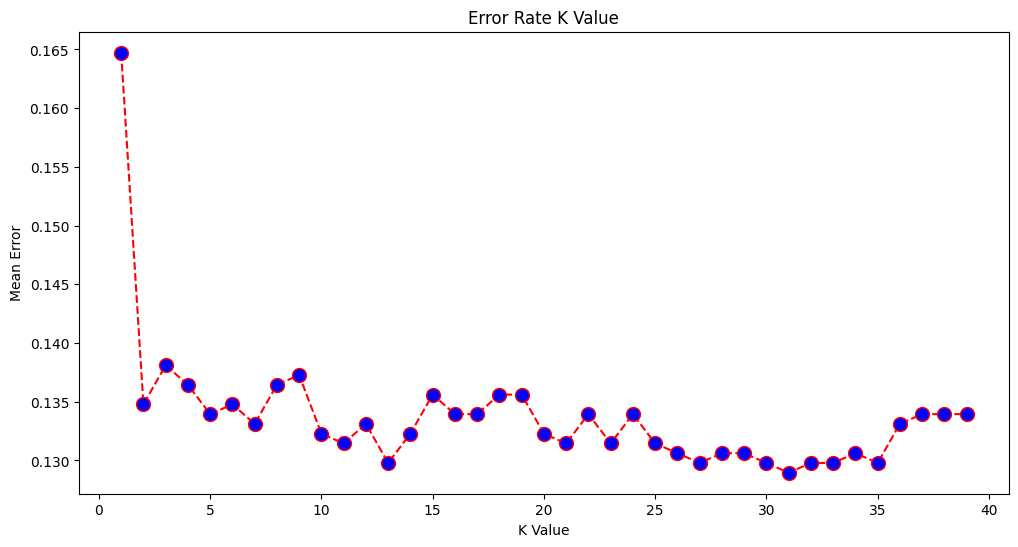

In [ ]:
#Importing and initiating required python libraries
#Creating a plot of mean error against K value, to see which k value gives the lowest prediction error
error = []
import numpy as np
import matplotlib.pyplot as plt
for i in range(1, 40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train_scaled, y_train)
    pred_i = knn2.predict(X_test_scaled)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Code block 19 from code re-use session 2

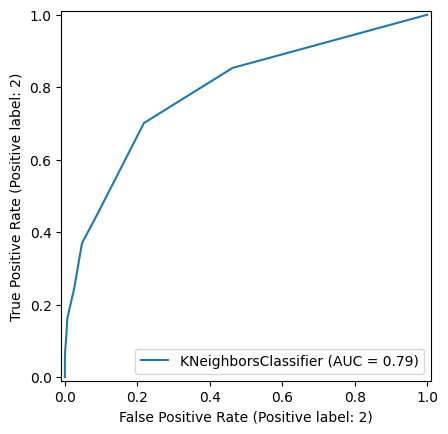

In [ ]:
knn = RocCurveDisplay.from_estimator(knn, X_test_scaled, y_test)
#Function to display AUC-ROC to see how well the model distinguishes between dead and alive mortality classes

Code block 25 from code re-use session 2

In [ ]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1,8), 'metric': ['euclidean','manhattan','hamming']}

knn_gscv = GridSearchCV(knn, param_grid, cv = 5, scoring = 'roc_auc')


knn_gscv.fit(X_train_scaled, y_train)

knn_gscv.best_params_
#Code block tunes Knn model's hyperparameters and displays the best combination of hyperparameters using my scaled train dataset

{'metric': 'euclidean', 'n_neighbors': np.int64(7)}

Code block 23 from code re-use session 2

Code block 17 from code re-use session 2

              precision    recall  f1-score   support

           1       0.88      0.97      0.93      1018
           2       0.65      0.29      0.40       184

    accuracy                           0.87      1202
   macro avg       0.76      0.63      0.66      1202
weighted avg       0.85      0.87      0.84      1202



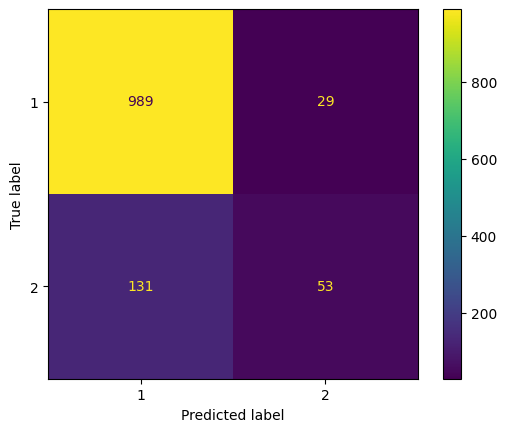

In [ ]:
#Function to predict mortality status of patients in the isolated scaled test data subset
y_pred = knn_gscv.predict(X_test_scaled)

#To assess how well the model predicted the mortality status of cancer patients in the unseen data subset
#Calculate and create a confusion matrix
cm_knn_gscv = confusion_matrix(y_test, y_pred, labels = knn_gscv.classes_)
disp_knn_gscv_cm = ConfusionMatrixDisplay(cm_knn_gscv, display_labels=knn_gscv.classes_)
disp_knn_gscv_cm.plot()

#Displaying foundation-combined performance metrics in a sngle report.
print(classification_report(y_test, y_pred))

Code block 19 from code re-use session 2

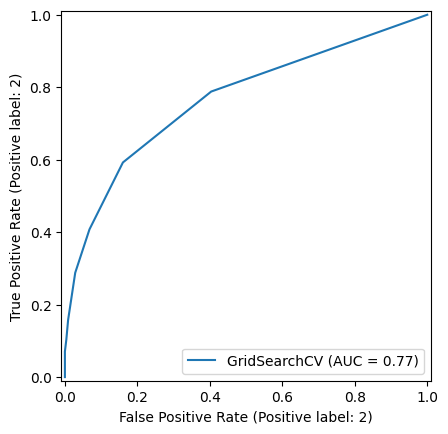

In [ ]:
knn_gscv = RocCurveDisplay.from_estimator(knn_gscv, X_test_scaled, y_test)
#Function to display AUC-ROC to see how well the model distinguishes between dead and alive mortality classes

Code block 10 from code re-use session 2

In [ ]:
logreg = LogisticRegression()
#Declaring logistic regression algorithm into environment

Code block 11 from code re-use session 2

In [ ]:
logreg.fit(X_train_scaled, y_train)
#Function to estimate logistic regression learnable parameters using scaled train datset

LogisticRegression()

Code block 23 from code re-use session 2

In [ ]:
y_pred_train=logreg.predict(X_train_scaled)
#Function to predict mortality status of patients in the isolated scaled test data subset

Code block 14 from code re-use session 2

In [ ]:
Comparison_df=pd.DataFrame({'Actual' : y_test,  'Predicted' : y_pred})

Comparison_df
#Creating and presenting a comparison of predicted and test data in a dataframe

,Actual,Predicted
684,1,1
160,1,1
517,1,2
2555,1,1
1781,1,1
...,...,...
3871,2,1
3418,1,1
1501,1,1
1579,1,1


Code block 15 from code re-use session 2

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred_train)

print ("the accuracy is: ", accuracy)
#Initiating the required library and function then calculating and presenting the accuracy score for training dataset

the accuracy is:  0.8987161198288159


Code block 16 from code re-use session 2

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

print ("The accuracy is: ", accuracy)
#Initiating the required library and function then calculating and presenting the accuracy score for test dataset

The accuracy is:  0.8668885191347754


Code block 23 from code re-use session 2

Code block 17 from code re-use session 2

              precision    recall  f1-score   support

           1       0.88      0.97      0.93      1018
           2       0.65      0.29      0.40       184

    accuracy                           0.87      1202
   macro avg       0.76      0.63      0.66      1202
weighted avg       0.85      0.87      0.84      1202



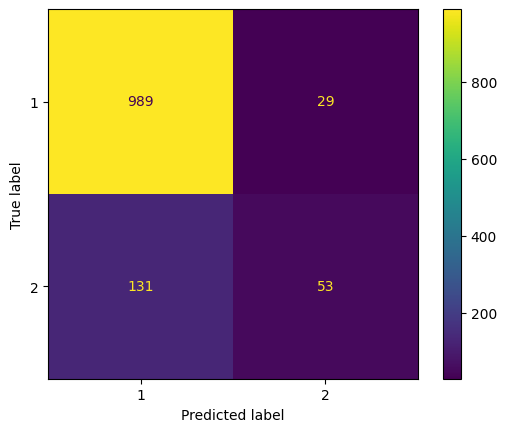

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = logreg.classes_)
#To assess how well the model predicted the mortality status of cancer patients in the unseen data subset
#Calculate and create a confusion matrix


disp = ConfusionMatrixDisplay(cm, display_labels = logreg.classes_)
#Displaying foundation-combined performance metrics in a sngle report.
print(classification_report(y_test, y_pred))
disp.plot()

Code block 19 from code re-use session 2

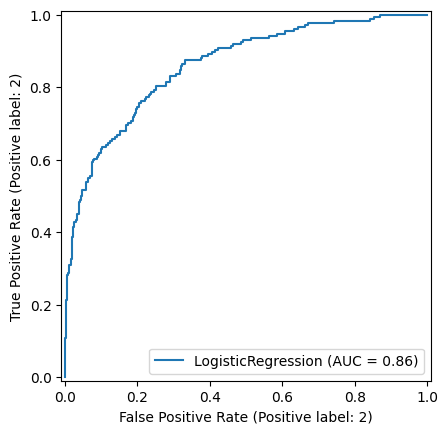

In [ ]:
logreg = RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test)
#Function to display AUC-ROC to see how well the model distinguishes between dead and alive mortality classes

Code block 27 from code re-use session 2

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_scaled, y_train)
#Initiating a library and Naive bayes algorithm
#Building/training Naive Bayes classification model

GaussianNB()

Code block 23 from code re-use session 2

In [ ]:
y_pred=nb.predict(X_test_scaled)
#Function to predict mortality status of patients in the isolated scaled test data subset

Code block 23 from code re-use session 2

Code block 17 from code re-use session 2

              precision    recall  f1-score   support

           1       0.90      0.87      0.88      1018
           2       0.39      0.46      0.42       184

    accuracy                           0.81      1202
   macro avg       0.64      0.66      0.65      1202
weighted avg       0.82      0.81      0.81      1202



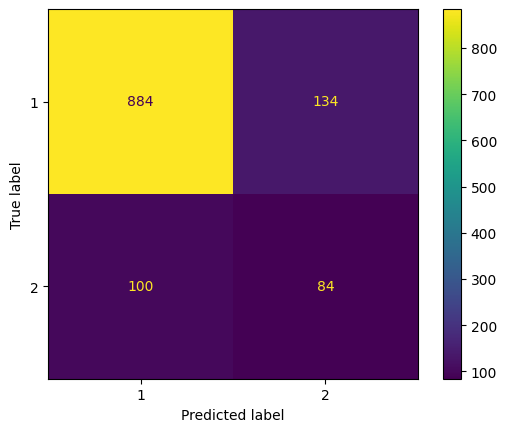

In [ ]:
#Displaying foundation-combined performance metrics in a sngle report.
print(classification_report(y_test, y_pred))

#To assess how well the model predicted the mortality status of cancer patients in the unseen data subset
#Calculate and create a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
nb_cm = confusion_matrix(y_test, y_pred, labels = nb.classes_)
nb_cm = ConfusionMatrixDisplay(nb_cm, display_labels = nb.classes_)
nb_cm.plot()


Code block 19 from code re-use session 2

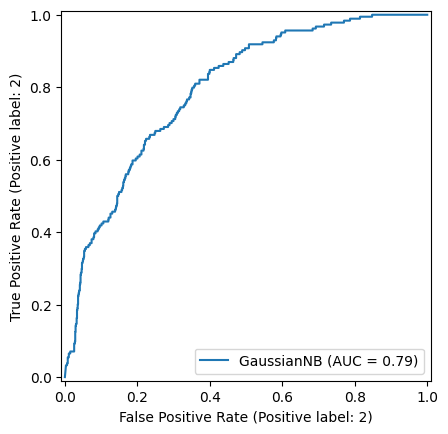

In [ ]:
nb = RocCurveDisplay.from_estimator(nb, X_test_scaled, y_test)
#Function to display AUC-ROC to see how well the model distinguishes between dead and alive mortality classes